In [12]:
my_list = [1,6,2,8,9,5,7,3,0,4]

In [13]:
def the_oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [14]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('winner found at index %i'%index)
        print('%i calls to the oracle used'%(index+1))
        break

winner found at index 6
7 calls to the oracle used


In [15]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#define oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [17]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [18]:
job = execute(grover_circ,backend)

In [19]:
result = job.result()

In [20]:
sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [21]:
#define reflection circuit
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [23]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

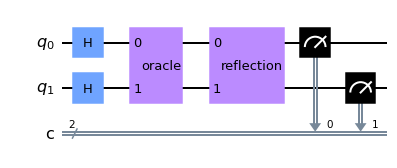

In [24]:
%matplotlib inline
grover_circ.draw('mpl')

In [25]:
job = execute(grover_circ,backend,shots=1)
result = job.result()
result.get_counts()

{'11': 1}